**FINAL PROJECT**

Ok, first we are going to get everything set up by importing the useful libraries (pandas, numpy, and matplot).

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Awesome!

The first metric we will be analyzing is playing fields.

***Playing Fields***

![playing fields](https://www.usu.edu/campusrec/images/ALF%20for%20tv%20small.jpg)

Now, lets read in the data set for playing fields around Pittsburgh and take a look.

In [3]:
playing_fields = pd.read_csv("https://data.wprdc.org/datastore/dump/6af89346-b971-41d5-af09-49cfdb4dfe23")
playing_fields.head()

,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,right_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,290.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,122.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,150.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,373.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,185.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870


Ok everything looks good.

Before we do anything else, why don't we get a better picture of the neighborhoods we are dealing with here.

In [4]:
playing_fields["neighborhood"].unique()

array(['South Side Slopes', 'South Side Flats', 'Lower Lawrenceville',
       'Banksville', 'Allentown', 'Brighton Heights', 'Hazelwood',
       'Lincoln-Lemington-Belmar', 'Windgap', 'Troy Hill',
       'South Oakland', 'Brookline', 'Arlington', 'Mount Washington',
       'Crafton Heights', 'East Hills', 'East Liberty', 'Highland Park',
       'Squirrel Hill South', 'Upper Lawrenceville', 'Fineview',
       'Regent Square', 'Garfield', 'Perry South', 'Perry North',
       'Elliott', 'Beechview', 'Morningside', 'Central Lawrenceville',
       'Bedford Dwellings', 'Terrace Village', 'Larimer', 'Beltzhoover',
       'Greenfield', 'Manchester', 'Allegheny Center', 'Central Oakland',
       'Lincoln Place', 'Sheraden', 'Shadyside', 'Spring Garden',
       'Oakwood', 'Stanton Heights', 'Carrick', 'Marshall-Shadeland',
       'Spring Hill-City View', 'West End', 'Polish Hill', 'Westwood',
       'Squirrel Hill North', 'Homewood South'], dtype=object)

That gives us the names of the individual neighborhoods, but what about knowing exactly how many we are working with.

We can easily check this with a small change to the previous code

In [5]:
playing_fields["neighborhood"].nunique()

51

Ok, how about how many playing fields we need to consider.

In [6]:
len(playing_fields)

113

That's actually pretty good, especially considering that a significant amount of the data set covers urban regions, which makes it somewhat more difficult to find the land needed for playing fields.

Now, lets breakdown the data set to analyze how the playing fields are distributed by neighborhood

In [7]:
playing_fields["neighborhood"].value_counts()

Brighton Heights            7
Brookline                   6
South Side Slopes           6
Carrick                     5
Squirrel Hill South         5
Highland Park               4
Hazelwood                   4
Lower Lawrenceville         4
Mount Washington            3
Troy Hill                   3
Shadyside                   3
Morningside                 3
Beltzhoover                 3
Sheraden                    3
Beechview                   3
South Side Flats            2
Central Lawrenceville       2
Westwood                    2
Greenfield                  2
Regent Square               2
Lincoln-Lemington-Belmar    2
Banksville                  2
Manchester                  2
Bedford Dwellings           2
Spring Hill-City View       2
Elliott                     2
Perry North                 2
Allegheny Center            2
South Oakland               2
Crafton Heights             2
Homewood South              1
East Hills                  1
Upper Lawrenceville         1
Squirrel H

This gives us a solid idea of the distribution of playing fields across the various neighborhoods in Pittsburgh, but we can create a visual representation as well to add some more insight.

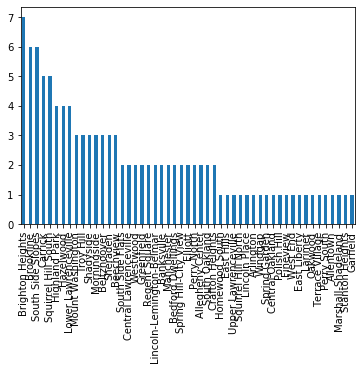

In [8]:
playing_fields["neighborhood"].value_counts().plot(kind="bar")

From both representations of the data, we see that there isn't a ton of variability in the amount of playing fields per neighborhood; however, there are definitely a few neighborhoods that stand out at the top, for instance Brighton Heights leading the pack with seven.

Lets take a closer look at the top five.

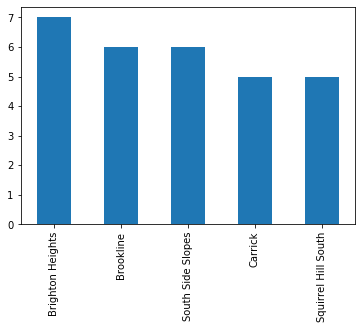

In [9]:
playing_fields["neighborhood"].value_counts().head().plot(kind="bar")

Perfect, we have our top five comprised of Brighton Heights, South Side Slopes, Brookline, Squirrel Hill South, and Carrick. We could simply end our investigation here, but the data has a few quirks that we should consider.

As we look through the data set, it seems designed to consider mainly baseball fields, with individual field locations classified by the shape(s)/usage of the field(s). Lets examine what types of fields we are working with. 

In [10]:
playing_fields["field_usage"].unique()

array(['Diamond Only', 'Diamond and Rectangular', 'Rectangular Only'],
      dtype=object)

So, there are fields used only for the diamond, rectangular fields that lack a diamond, and locations that are multi-purpose, offering both a rectangular field and a diamond. For these multi-purpose locations, the data set does not specify whether their mixed usage is because there are multiple fields at the location or that the singular field has all of the equipment and lines to be used for all kinds of activities. We will be assuming the later, that each piece of data corresponds to one field only, in order to avoid the complexities that accompany the other option.  

Something else to consider is that the data set's design has left it impossible to gauge the size of rectangular fields, as the size of the fields is only indicated by the distance from home plate to left, center, and right field respectively. Obviously, this complicates things as their is no way to measure exactly how much land each neighborhood has dedicated to playing fields.

Furthermore, the data set also contains a "has_lights" field that stipulates whether or not the field has lights, giving us another factor to consider. Playing fields with lights are arguably more valuable than those without, as they can be used for greater periods of time. 

So, how are we going to take these factors into account. By default, we will give all playing fields a value of 1. Fields that are multi-purpose will recieve an additional point of value on top of that. We will be giving fields with lights an additional .25 as well to account for the additional use they offer that fields without lights lack.  

So, lets apply this to the data by generating two subsets of the original data that encompass multi-purpose fields and fields with lights

In [11]:
both_options = playing_fields["field_usage"] == "Diamond and Rectangular"
multi_purpose = playing_fields[both_options]
multi_purpose["neighborhood"].value_counts()

Morningside              3
Westwood                 2
Central Lawrenceville    2
Brookline                2
Highland Park            2
Beltzhoover              1
West End                 1
Elliott                  1
Lower Lawrenceville      1
Terrace Village          1
Homewood South           1
South Side Flats         1
Polish Hill              1
Sheraden                 1
Allegheny Center         1
Name: neighborhood, dtype: int64

This represents the number of fields in each neighborhood that are multi-purpose, meaning they have both a diamond and a rectangular field.

We will factor this into the final equation to determine the best neighborhood in Pittsburgh.

Here are some visuals for the data.

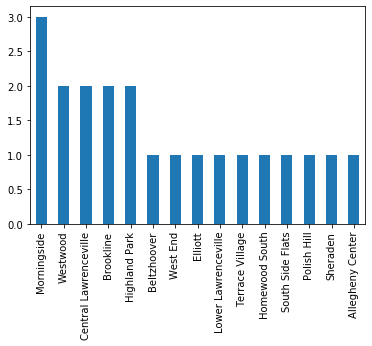

In [12]:
multi_purpose["neighborhood"].value_counts().plot(kind="bar")

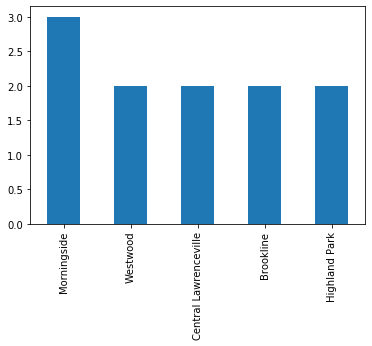

In [13]:
multi_purpose["neighborhood"].value_counts().head().plot(kind="bar")

In [14]:
has_lights = playing_fields["has_lights"] == "t"
fields_with_lights = playing_fields[has_lights]
fields_with_lights["neighborhood"].value_counts()

South Side Slopes           4
Morningside                 3
Mount Washington            3
Carrick                     3
Brookline                   3
Troy Hill                   3
Crafton Heights             2
Bedford Dwellings           2
Westwood                    2
Beechview                   2
Squirrel Hill South         2
Elliott                     2
Central Lawrenceville       2
Lower Lawrenceville         2
Greenfield                  2
Homewood South              1
Manchester                  1
Sheraden                    1
Lincoln-Lemington-Belmar    1
Fineview                    1
Shadyside                   1
Terrace Village             1
Windgap                     1
Banksville                  1
Perry North                 1
South Oakland               1
Beltzhoover                 1
Polish Hill                 1
Hazelwood                   1
Perry South                 1
Spring Hill-City View       1
Garfield                    1
Name: neighborhood, dtype: int64

This represents the number of fields in each neighborhood that have lights.

We will factor this into the final equation to determine the best neighborhood in Pittsburgh.

Here are some visuals for the data.

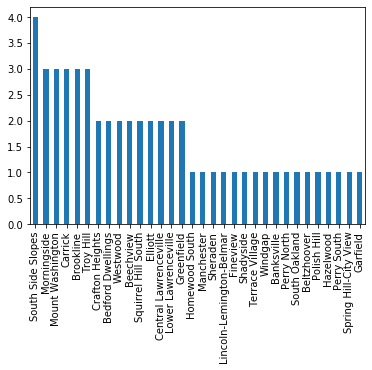

In [15]:
fields_with_lights["neighborhood"].value_counts().plot(kind="bar")

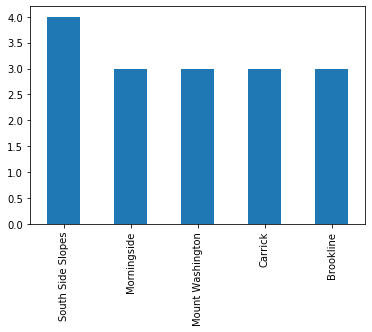

In [16]:
fields_with_lights["neighborhood"].value_counts().head().plot(kind="bar")

Now lets step away from the playing fields and begin to look at playgrounds in Pittsburgh.

In [17]:
playgrounds = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
playgrounds.head()

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021831
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


Let's check out the neighborhoods.

In [18]:
playgrounds["neighborhood"].unique()

array(['Beechview', 'Crawford-Roberts', 'Central Northside',
       'Bedford Dwellings', 'South Side Slopes', 'South Side Flats',
       'Lower Lawrenceville', 'Banksville', 'Homewood North', 'Bon Air',
       'Central Oakland', 'Brighton Heights', 'Brookline', 'Hazelwood',
       'Squirrel Hill South', 'Spring Garden', 'Lincoln-Lemington-Belmar',
       'Windgap', 'Troy Hill', 'Westwood', 'Perry South', 'Homewood West',
       'Allegheny Center', 'Strip District', 'Stanton Heights',
       'Crafton Heights', 'West Oakland', 'East Carnegie',
       'Duquesne Heights', 'East Liberty', 'Esplen', 'Fairywood',
       'Highland Park', 'Upper Lawrenceville', 'Fineview',
       'Regent Square', 'Garfield', 'Greenfield', 'South Oakland',
       'Allentown', 'Hays', 'Elliott', 'Morningside', 'Terrace Village',
       'Larimer', 'Carrick', 'Central Lawrenceville', 'Lincoln Place',
       'Manchester', 'Marshall-Shadeland', 'Sheraden', 'Beltzhoover',
       'Shadyside', 'Mount Washington', 'Oakwo

That looks like quite a bit more than when we were looking at the playing fields. How many neighborhoods do we have here.

In [19]:
playgrounds["neighborhood"].nunique()

67

There's 16 more neighborhoods here! We'll have to account for that later when deciding which neighborhood is the best for your kids.

Now how many parks do we have exactly?

In [20]:
len(playgrounds)

121

That's a fair amount of playgrounds, just some quick math would recommend just under an average of 2 playgrounds per neighborhood.

Why don't we see how many playgrounds each neighborhood actually has?

In [21]:
playgrounds["neighborhood"].value_counts()

Squirrel Hill South    8
South Side Slopes      5
Beechview              5
Allegheny Center       4
Sheraden               4
                      ..
Strip District         1
West End               1
Central Oakland        1
Shadyside              1
Middle Hill            1
Name: neighborhood, Length: 67, dtype: int64

How about we make that more visual.

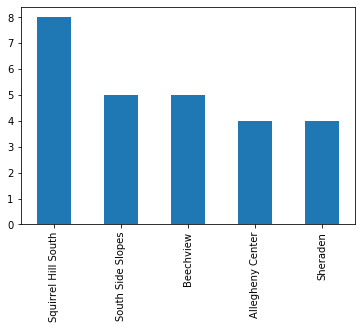

In [22]:
playgrounds["neighborhood"].value_counts().head().plot(kind="bar")

Wow! Immediately we see Squirrel Hill South with the most but a large margin, sitting on top with 8 playgrounds. Followed by Beechview and South Side Slopes tied with 5. So its safe to say Squirrel Hill South is the best neighborhood in terms of playgrounds, right?

Not necessarily, a big aspect of playground is having thing for everyone. Luckily for us, we have another dataset on playground equipment and whether they are ADA accessible. For those who don't know the ADA is the American with Disabilities Act, and sets guidelines on the accessibilty requirements of public and commercial land in order to prohibit discrimination against the disabled.

For example Chartiers Playground contains ADA accessible swings:
![ ](https://tools.wprdc.org/images/pittsburgh/playgrounds/Chartiers_Playground.jpg)

Now with this in mind lets pop our new database into pandas and run some of the same code one it.

In [23]:
playground_equipment = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
playground_equipment.head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817


In [24]:
playground_equipment["neighborhood"].unique()

array(['Beechview', 'Allegheny Center', 'Squirrel Hill South', 'Windgap',
       'Perry South', 'Crafton Heights', 'Fineview', 'Terrace Village',
       'Hazelwood', 'Lincoln Place', 'Sheraden', 'Brookline', 'Oakwood',
       'New Homestead', 'South Side Slopes', 'Upper Hill',
       'Brighton Heights', 'Allentown', 'East Liberty', 'Highland Park',
       'Central Northside', 'Bloomfield', 'Mount Washington', 'Shadyside',
       'Westwood', 'Hays', 'Polish Hill', 'Central Oakland',
       'Lincoln-Lemington-Belmar', 'Esplen', 'Greenfield',
       'Crawford-Roberts', 'Bedford Dwellings', 'Marshall-Shadeland',
       'Beltzhoover', 'West Oakland', 'Elliott', 'Spring Garden',
       'Homewood West', 'Strip District', 'Stanton Heights',
       'East Carnegie', 'Upper Lawrenceville', 'South Oakland',
       'Morningside', 'South Side Flats', 'Central Lawrenceville',
       'Manchester', 'Garfield', 'Lower Lawrenceville', 'Carrick',
       'Spring Hill-City View', 'Bluff', 'Middle Hill', 'Ba

In [25]:
playground_equipment["neighborhood"].nunique()

66

Uh oh, it seems we have one less neighborhood. That's okay, we'll assume that playground has no ADA accessible equipement when we get to the end.

In [26]:
playground_equipment["neighborhood"].value_counts()

Squirrel Hill South    32
Beechview              21
Allegheny Center       15
South Side Slopes      14
Sheraden               13
                       ..
Esplen                  2
Westwood                2
East Carnegie           2
Strip District          1
West Oakland            1
Name: neighborhood, Length: 66, dtype: int64

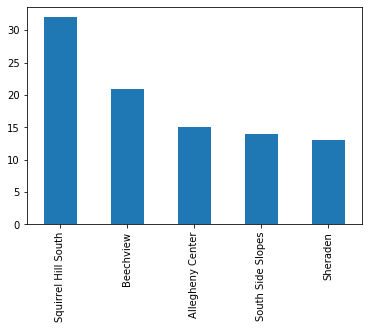

In [27]:
playground_equipment["neighborhood"].value_counts().head().plot(kind="bar")

So now we've arrived with a new graph featuring similar faces from the earlier graph. We still see Squirrel Hill South dominating the competition though. However, we have not filtered out the ADA accessible yet. So lets do that.

In [28]:
accessible = playground_equipment["ada_accessible"] == "t"
accessible_playgrounds = playground_equipment[accessible]

accessible_playgrounds.head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
10,1811257536,Cross and Strauss Playground,Swing 2 Bays,Little Tykes,Pour in Place,t,NaN,Cross St,Perry South,6,26,42003261400,1,26,1,1-12,40.465189,-80.020173
15,490747758,Dunbar Playground,Swing 2 Bays,Playworld,Pour in Place,t,1201.0,Clairhaven St,Crafton Heights,2,28,42003281500,5,28,6,1-18,40.439321,-80.051894
18,595152426,Fineview Playground,Swing 2 Bays,Playworld,Greenpark Breakfall,t,NaN,Fineview Ave,Fineview,1,25,42003250900,1,25,1,1-10,40.461713,-80.003621


In [29]:
accessible_playgrounds["neighborhood"].value_counts()

Squirrel Hill South         7
South Side Slopes           4
Beechview                   4
Sheraden                    3
Highland Park               3
Elliott                     3
Mount Washington            3
Morningside                 2
Brighton Heights            2
South Side Flats            2
Crawford-Roberts            2
Beltzhoover                 2
Manchester                  2
Hazelwood                   2
Fineview                    2
Greenfield                  2
Carrick                     2
East Liberty                2
Lincoln-Lemington-Belmar    2
Bloomfield                  2
Perry North                 1
Fairywood                   1
Bluff                       1
Polish Hill                 1
Garfield                    1
Crafton Heights             1
Regent Square               1
East Carnegie               1
Swisshelm Park              1
Shadyside                   1
Lincoln Place               1
Central Lawrenceville       1
Windgap                     1
Duquesne H

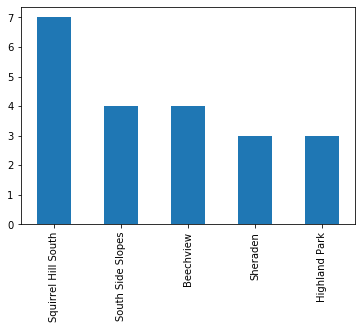

In [30]:
accessible_playgrounds["neighborhood"].value_counts().head().plot(kind="bar")

Even within ADA accessible playground equipment Squirrel Hill South remains on top, surprisingly we also see South Side Slopes return to its spot tied with Beechview in second after if dropped initially while looking at total playground equipment. Squirrel Hill South's numbers within each category will definitely earn it the top spot for playgrounds.

When admiring your Childhood it's hard to  neglect the beauty and fun that Spray Parks and pools offered. As such, we can't possibly look at the best neighborhood and not take a look at the water based fun that can be found in many of the neighborhoods of Pittburgh.

In [31]:
pitt_pools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")
pitt_pools.head()

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448720,-79.978325
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414758,-80.040551
2,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414989,-80.019170
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461989,-79.953310
4,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405065,-79.936896


_____________________________________________________________________________________
    ***************************************************************************

Nice, the data set looks promising so far. After all everyone likes a good pool. that being said, there is a column called neighborhood but let us take a closer look at what neighbors are actually fun and contain a pool/spray park.

    *********************************************************************************
_________________________________________________________________________________________

In [32]:
pitt_pools["neighborhood"].unique()

array(['Bedford Dwellings', 'Banksville', 'Beechview', 'Bloomfield',
       'Hazelwood', 'Troy Hill', 'East Hills', 'Highland Park',
       'Homewood South', 'Brighton Heights', 'Greenfield',
       'Lincoln Place', 'Shadyside', 'Brookline', 'South Side Flats',
       'Carrick', 'Mount Washington', 'Perry North',
       'Squirrel Hill South', 'Sheraden', 'Allegheny Center',
       'Beltzhoover', 'Polish Hill', 'Westwood', 'South Side Slopes',
       'Lincoln-Lemington-Belmar'], dtype=object)

Not going to lie, that makes me dizzy just looking at it. If only there was a way to look
at the exact number of neighborhoods invloved... ahh but ofcourse that is the whole point
of python. Let us make use of those labs and search for the exact number.

In [33]:
pitt_pools["neighborhood"].nunique()

26

_____________________________________________________________________________________
    ***************************************************************************

Not too shabby, I gurantee you that you inner child would have loved to try them all and
see which one is the king of pools, but let us do that for you. To further out search
we want to see how many pools there are in total.

    *********************************************************************************
_________________________________________________________________________________________

In [34]:
len(pitt_pools)

28

_____________________________________________________________________________________
    ***************************************************************************

26 neighborhoods and 28 pools, something doesn't add up, so let's see what neighborhood(s)
have extra pools! Honestly there is no denying that that is a major bonus to our water fun
metric.

    *********************************************************************************
_________________________________________________________________________________________

In [35]:
pitt_pools["neighborhood"].value_counts()

Highland Park               2
South Side Flats            2
Squirrel Hill South         1
Allegheny Center            1
Sheraden                    1
Bloomfield                  1
Mount Washington            1
Bedford Dwellings           1
South Side Slopes           1
Perry North                 1
Troy Hill                   1
Lincoln Place               1
Westwood                    1
Homewood South              1
Beltzhoover                 1
Brighton Heights            1
Hazelwood                   1
Polish Hill                 1
Brookline                   1
Beechview                   1
Banksville                  1
Shadyside                   1
Greenfield                  1
Lincoln-Lemington-Belmar    1
East Hills                  1
Carrick                     1
Name: neighborhood, dtype: int64

_____________________________________________________________________________________
    ***************************************************************************

While that is a very simple list I much prefer a good visual so let's put our trusty data
and make a good old bar graph out of it so that we can truly appreciate the neighborhoods
with more pools/spray parks!

    *********************************************************************************
_________________________________________________________________________________________

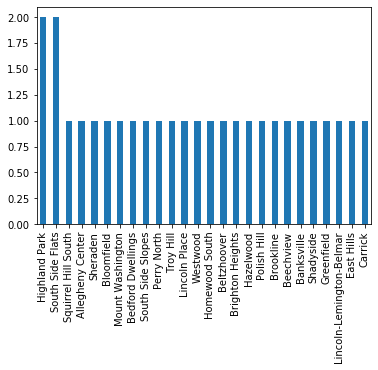

In [36]:
pitt_pools["neighborhood"].value_counts().plot(kind="bar")

_____________________________________________________________________________________
    ***************************************************************************

Granted that there seems to be a general trend with most neighborhood containing 1 with 
the exception of 2, but let us zoom into this rather hectic graph inorder to look at the
top five.

    *********************************************************************************
_________________________________________________________________________________________

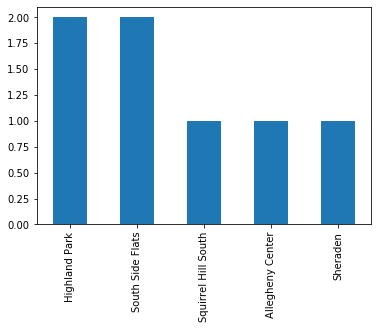

In [37]:
pitt_pools["neighborhood"].value_counts().head().plot(kind="bar")

_____________________________________________________________________________________
    ***************************************************************************

While we love keeping very casual and indulging in the fun and games that comes with talking
about pools but we can't be total irreponsible adults and neglect to talk about safety concerns
that come with these areas. So let's look at the number of police zones in these areas.
In reality you'd think that more police zones correlates to safer areas but if an area needs more patrolling (as statistics shows) indicates that that area is indeed more dangerous. This is not always the case but I will take it as such inorder to rank 
the safety.

    *********************************************************************************
_________________________________________________________________________________________

In [38]:
less_risk_of_crime = pitt_pools["police_zone"] <= 3
safer_zone = pitt_pools[less_risk_of_crime]
safer_zone.head()

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448720,-79.978325
5,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458739,-79.988366
10,2092220498,Jack Stack,Pool,NaN,Pittsburgh Water and Sewer Authority,205800.0,https://tools.wprdc.org/images/pittsburgh/pool...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.486884,-80.030632
15,1029407685,Oliver,Pool,NaN,Pennsylvania American Water,107000.0,https://tools.wprdc.org/images/pittsburgh/pool...,South Side Flats,3,17,42003170200,3,17,3,4-2,40.429628,-79.988922
16,328662701,Ormsby,Pool,NaN,Pittsburgh Water and Sewer Authority,205800.0,https://tools.wprdc.org/images/pittsburgh/pool...,South Side Flats,3,16,42003160900,3,16,3,4-24,40.428950,-79.974114


_____________________________________________________________________________________
    ***************************************************************************

Now lets make a list of the neighborhoods that met the criteria!

     *********************************************************************************
_________________________________________________________________________________________

In [39]:
safer_zone["neighborhood"].value_counts()

South Side Flats     2
South Side Slopes    1
Mount Washington     1
Troy Hill            1
Polish Hill          1
Beltzhoover          1
Brighton Heights     1
Perry North          1
Allegheny Center     1
Bedford Dwellings    1
Carrick              1
Name: neighborhood, dtype: int64

 _____________________________________________________________________________________
    ***************************************************************************

Now to make a visual detailing which neighborhood follows through.

     *********************************************************************************
_________________________________________________________________________________________

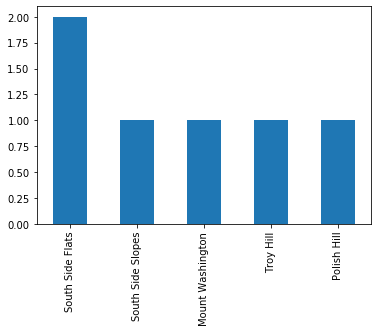

In [40]:
safer_zone["neighborhood"].value_counts().head().plot(kind="bar")

As you can see South Slide Flats's two parks match the criteria, which is a good indication of 
both their consistancy and safety!

_____________________________________________________________________________________
    ***************************************************************************

Now getting the arguably the most important part, space. A pool is only worth the title of king of pools if it has the space to back it up, keep in mind that the only ones being considered here are the ones that are type = pools, obvioulsy spray parks have the own point system that is worth simple because spray parks are objectively funner (also inclusive to those that don't know how to swim) and safer than pools :)

     *********************************************************************************
_________________________________________________________________________________________

In [41]:
spacious_pools = pitt_pools["capacity"] <= 250000
better_pools = pitt_pools[spacious_pools]
better_pools.head()

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414758,-80.040551
9,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454310,-79.899891
10,2092220498,Jack Stack,Pool,NaN,Pittsburgh Water and Sewer Authority,205800.0,https://tools.wprdc.org/images/pittsburgh/pool...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.486884,-80.030632
11,778775283,Magee,Pool,NaN,Pittsburgh Water and Sewer Authority,195000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Greenfield,5,15,42003151700,3,15,4,2-15,40.424814,-79.937006
12,23531050,McBride,Pool,NaN,Pennsylvania American Water,18000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Lincoln Place,5,31,42003310200,3,31,4,4-20,40.370392,-79.907340


_____________________________________________________________________________________
    ***************************************************************************

Once again let us make a list with the data we have and let their true sea-through (pun intened) colors show!

    *********************************************************************************
_________________________________________________________________________________________

In [42]:
better_pools["neighborhood"].value_counts()

South Side Flats       2
Perry North            1
Lincoln Place          1
Polish Hill            1
Brighton Heights       1
Westwood               1
Squirrel Hill South    1
Homewood South         1
Greenfield             1
Carrick                1
Banksville             1
Name: neighborhood, dtype: int64

_____________________________________________________________________________________
    ***************************************************************************

Looking Good!, Last but not least let us this fun inducing data in an easier format to digest!

     *********************************************************************************
_________________________________________________________________________________________

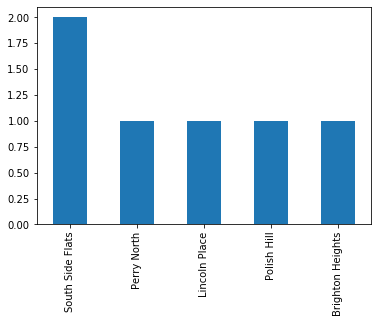

In [43]:
better_pools["neighborhood"].value_counts().head().plot(kind="bar")

And there you have it folks!